### CSC-478
### Assignment 3
### Weiwei Yao

### 1. Linear Regression [Dataset: communities.zip]
For this problem you will experiment with linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] .

#### 1.a Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [1]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
%matplotlib inline

In [2]:
### Read the data 
df = pd.read_csv("communities.csv",na_values=["?"])
df.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [3]:
### Remove "state" and "community name" 
df.drop(["state","communityname" ], inplace = True, axis =1)
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [4]:
### Check missing values
df.columns[df.isnull().any()]

Index(['OtherPerCap'], dtype='object')

In [5]:
### We do have missing values, Let's fill it with the column mean
df.OtherPerCap.fillna(df.OtherPerCap.mean(), axis=0, inplace=True)
print ("Do we still have missing values in OtherPerCap: %s" % (df.OtherPerCap.isnull().values.any()))

Do we still have missing values in OtherPerCap: False


In [6]:
### Check descriptive statistics 
df.describe(include = 'all')

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
### Separate the target attribute "ViolentCrimesPerPop"
label = df["ViolentCrimesPerPop"]
df.drop("ViolentCrimesPerPop", inplace = True, axis =1)

#### 1.b Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).

In [8]:
from sklearn.cross_validation import KFold
### Convert dataframe to array
X = np.array(df)
Y = np.array(label)

### add a column of ones for training
X = np.array([np.concatenate((v,[1])) for v in X])

In [9]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [10]:
### Compute and print the weights
w = standRegres(X,Y)
print (w.shape)
print (w)

(98, 1)
[[  1.31108068e-01]
 [ -3.14114977e-02]
 [  2.09909670e-01]
 [ -4.05351612e-02]
 [ -1.38892919e-02]
 [  5.89726825e-02]
 [  1.23399025e-01]
 [ -2.22621600e-01]
 [ -1.47500199e-01]
 [  5.01635477e-02]
 [ -2.42413829e-01]
 [  4.64024392e-02]
 [ -1.96945615e-01]
 [ -2.06117500e-01]
 [  4.65935490e-02]
 [ -1.77212915e-01]
 [  6.30148504e-02]
 [  1.14942190e-02]
 [ -9.08951848e-02]
 [  2.74640044e-01]
 [  1.01752476e-01]
 [ -3.31517562e-01]
 [ -2.91799268e-02]
 [ -3.54483393e-02]
 [  2.26173855e-02]
 [  4.30950137e-02]
 [  3.44408548e-02]
 [  1.28412458e-01]
 [ -1.91293360e-01]
 [ -1.00769002e-01]
 [  6.46856092e-02]
 [  1.06062117e-01]
 [  2.44126006e-06]
 [  2.34984611e-01]
 [ -3.75705330e-02]
 [ -7.74957660e-03]
 [  4.66779619e-01]
 [  2.26295907e-01]
 [  1.74621953e-01]
 [ -5.75206227e-01]
 [ -1.41954207e-01]
 [  5.68782538e-02]
 [ -3.51066745e-01]
 [ -3.49493414e-02]
 [  4.63705978e-04]
 [  5.57016681e-02]
 [ -1.82238360e-01]
 [ -1.54646442e-01]
 [  1.26172899e-01]
 [ -1.443205

    Calculate RMSE on Training

In [11]:
### Perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE
from sklearn.linear_model import LinearRegression, Lasso, Ridge
Y_pred = np.mat(X) * w
Y_predT = np.mat(Y_pred).T
print(Y_predT)

[[ 0.16551838  0.29062973  0.38367799 ...,  0.40142767  0.16882645
   0.37326947]]


 ##### Plot the correlation between predicted and actual target attribute values

In [12]:
corr = np.corrcoef(Y_predT, np.mat(Y))
print ("The correlation is: %0.5f" % corr[0][1])

The correlation is: 0.83295


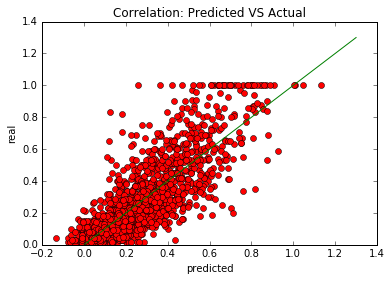

In [13]:
plt.plot(Y_predT, np.mat(Y),'ro')
plt.plot([0,1.3],[0,1.3], 'g-')
plt.title('Correlation: Predicted VS Actual')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

In [14]:
### compute RMSE
err = abs(Y_predT - np.mat(Y)) # predicted - actual
total_error = np.dot(err,err.T)
rmse_train = np.sqrt(total_error/len(Y_pred))
print ("The RMSE on training is %0.5f" % rmse_train)

The RMSE on training is 0.12889


##### Calculate RMSE on 10 folds

In [15]:
kf = KFold(len(X), n_folds=10)
rmse_10cv = 0
for train,test in kf:
    w_10cv = standRegres(X[train],Y[train]) ### calculate weights
    Y_predT_10cv = np.mat(np.mat(X[test]) * w_10cv).T
    err = abs(Y_predT_10cv - np.mat(Y[test]))
    total_error = np.dot(err,err.T)
    rmse_10cv += total_error
rmse_10cv = np.sqrt(rmse_10cv /len(Y))
print ("The RMSE on 10 fold cross validation is %0.5f" % rmse_10cv)
print ("The RMSE on cross validation is %0.5f higher than on training set." % (rmse_10cv - rmse_train))

The RMSE on 10 fold cross validation is 0.13633
The RMSE on cross validation is 0.00744 higher than on training set.


#### 1.c Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]


##### Find the best percentile using cross-validation on the training set

C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda

1 0.114079092242
6 0.1011518954
11 0.101087385712
16 0.101044809619
21 0.0988642451353
26 0.0965726891161
31 0.096528158
36 0.0956967798594


C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda

41 0.0958121897629
46 0.0964118498182
51 0.0967204361004
56 0.0969176371878
61 0.0976794769831


C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda

66 0.0977719076944
71 0.0980930767673
76 0.0977541455883
81 0.0976555286914
86 0.0971241430783
91 0.0975181741896
96 0.0968828262608
Optimal percentile of features:36 

Optimal number of features:34 



C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Weiwei\Anaconda

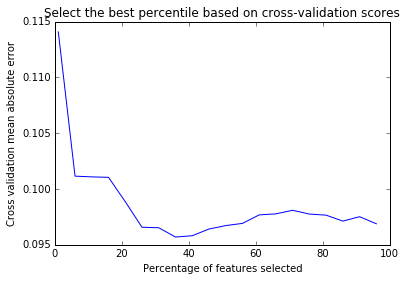

In [16]:
linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X, Y)
    scores = abs(cross_validation.cross_val_score(linreg, X_train_fs, Y, cv=5, scoring='mean_absolute_error'))
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentil = np.where(results == results.min())[0]
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentil]), "\n")
optimal_num_features = int(floor(percentiles[optimal_percentil]*len(df.columns)/100))
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
plt.figure()
plt.title("Select the best percentile based on cross-validation scores")
plt.xlabel("Percentage of features selected")
plt.ylabel("Cross validation mean absolute error")
plt.plot(percentiles,results)


Fit the model using the best percentile of features

In [17]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=36)
X_train_fs = fs.fit_transform(X, Y)


Print the names and weights of seleacted features

In [18]:
for i in range(len(df.columns.values)):
    if fs.get_support()[i]:
        print (df.columns.values[i],'\t', fs.scores_[i])

population 	 310.369918779
racepctblack 	 1319.68643314
racePctWhite 	 1758.77227347
numbUrban 	 302.12358082
medIncome 	 437.1590743
pctWInvInc 	 990.700974651
pctWPubAsst 	 982.200467892
medFamInc 	 475.837601763
perCapInc 	 281.878264885
NumUnderPov 	 499.025448645
PctPopUnderPov 	 745.599159432
PctLess9thGrade 	 405.110531951
PctNotHSGrad 	 607.30932519
PctUnemployed 	 679.145660493
MalePctDivorce 	 759.581937457
FemalePctDiv 	 891.494024673
TotalPctDiv 	 876.510085951
PctFam2Par 	 1987.05731023
PctKids2Par 	 2388.61868809
PctYoungKids2Par 	 1588.37986036
PctTeen2Par 	 1550.53163637
NumIlleg 	 567.975360335
PctIlleg 	 2381.98320035
PctLargHouseFam 	 343.442480513
PctPersOwnOccup 	 759.916937383
PctPersDenseHous 	 514.036224481
PctHousLess3BR 	 578.789197875
MedNumBR 	 291.680471184
HousVacant 	 430.103642138
PctHousOwnOcc 	 566.905240411
PctVacantBoarded 	 605.507916549
PctHousNoPhone 	 623.483263567
PctWOFullPlumb 	 305.118590384
NumInShelters 	 327.491789621
NumStreet 	 260.85415

#### 1.d Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. 

In [19]:
### 20% - 80% train test split
### Full data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)
### Data with feature slection
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_train_fs, Y, test_size=0.2, random_state=50)

In [20]:
### Define the function
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    

    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        #print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # calculat mae error on training set
        #train_scores[i] = mean_absolute_error(clf.fit(X_train,y_train).predict(X_test), y_test)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=50)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding MAE on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = mean_absolute_error(clf.predict(X[train]), y[train])
            k_test_scores[j] = mean_absolute_error(clf.predict(X[test]), y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores) 
        test_scores[i] = np.mean(k_test_scores) 
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Absolute Error")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

 ##### Ridge Regression

In [21]:
### Set alpha values
alpha = np.linspace(0.0001,50 ,1000)
alpha = np.array([float(e) for e in alpha])
ridreg = Ridge()

Min alpha values for ridge is 6.006094.


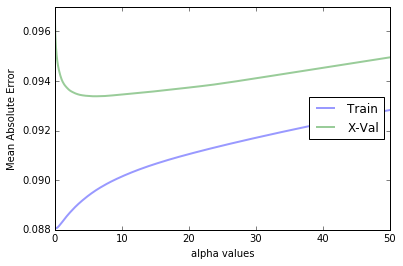

In [22]:
### Get the best alpha
def best_para(model, model_name):
    train_scores, test_scores = calc_params(X_train, y_train, model, alpha, 'alpha', 5)
    min_err_id = np.where(test_scores == test_scores.min())
    min_alpha = alpha[min_err_id]
    print("Min alpha values for %s is %f." % (model_name, min_alpha))
best_para(ridreg, 'ridge')   

In [37]:
### Fit the model on full test data 
ridreg = Ridge(alpha=6.006094)
ridreg.fit(X_train, y_train)    
error = mean_absolute_error(ridreg.predict(X_test), y_test)
print ("Ridge Regression")
print ("The MAE on the full test data is %f" % (error))
### Fit the model on data with selected features 
ridreg.fit(X_train_fs, y_train_fs)    
error = mean_absolute_error(ridreg.predict(X_test_fs), y_test_fs)
print ("The MAE on the test data with selected features is %f" % (error))

Ridge Regression
The MAE on the full test data is 0.103038
The MAE on the test data with selected features is 0.105922


##### Lasso Regression

Min alpha values for Lasso is 0.000100.


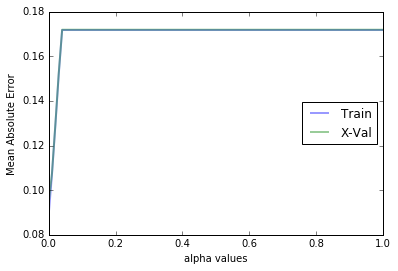

In [24]:
alpha = np.linspace(0.0001,1 ,100)
alpha = np.array([float(e) for e in alpha])
lasreg = Lasso()
best_para(lasreg, 'Lasso') 

In [38]:
### ### Fit the model on full test data 
lasreg = Ridge(alpha=0.0001)
lasreg.fit(X_train, y_train)    
error = mean_absolute_error(lasreg.predict(X_test), y_test)
print("Lasso Regression")
print ("The MAE on the full test data is %f" % (error))

### Fit the model on data with selected features 
lasreg.fit(X_train_fs, y_train_fs)    
error = mean_absolute_error(lasreg.predict(X_test_fs), y_test_fs)
print ("The MAE on the test data with selected features is %f" % (error))

Lasso Regression
The MAE on the test data is 0.102068
The MAE on the test data with selected features is 0.104655


#### Conclusion :
For ridge regression, the MAE on the training set increase as alpha increases, while the MAE on the validation sets decrease when alpha is in [0,6] and then start to increase when alpha gets larger. The screen plot shows that [3, 6] is the best range for alpha in this case.
    
For lasso regression, the MAE on the training and validation sets are almost the same given different alpha values. They are increasing when alpha is very very small and then they stopped changing. In this case, 0.0001 is the best alpha value here.
    

#### 1.e Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

##### Stochastic Gradient Descent Regression.

In [26]:
### Standardize the features
scaler = StandardScaler()
X_norm = scaler.fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=50)

In [27]:
sgdreg = SGDRegressor()
param = {'penalty': ['l1', 'l2'],'alpha': np.linspace(0.0001,50, 500)}
gs = GridSearchCV(sgdreg, param, verbose=2, cv=5)

In [28]:
%time _ = gs.fit(X_norm, Y)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l1, alpha=0.0001 ........................................
[CV] ............................... penalty=l1, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] ............................... penalty=l2, alpha=0.0001 -   0.0s
[CV] penalty=l2, alpha=0.0001 ........................................
[CV] .......

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.1s


[CV] ....................... penalty=l1, alpha=0.601301202405 -   0.0s
[CV] penalty=l1, alpha=0.601301202405 ................................
[CV] ....................... penalty=l1, alpha=0.601301202405 -   0.0s
[CV] penalty=l1, alpha=0.601301202405 ................................
[CV] ....................... penalty=l1, alpha=0.601301202405 -   0.0s
[CV] penalty=l2, alpha=0.601301202405 ................................
[CV] ....................... penalty=l2, alpha=0.601301202405 -   0.0s
[CV] penalty=l2, alpha=0.601301202405 ................................
[CV] ....................... penalty=l2, alpha=0.601301202405 -   0.0s
[CV] penalty=l2, alpha=0.601301202405 ................................
[CV] ....................... penalty=l2, alpha=0.601301202405 -   0.0s
[CV] penalty=l2, alpha=0.601301202405 ................................
[CV] ....................... penalty=l2, alpha=0.601301202405 -   0.0s
[CV] penalty=l2, alpha=0.601301202405 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:    1.0s


[CV] ........................ penalty=l2, alpha=1.80370360721 -   0.0s
[CV] penalty=l2, alpha=1.80370360721 .................................
[CV] ........................ penalty=l2, alpha=1.80370360721 -   0.0s
[CV] penalty=l2, alpha=1.80370360721 .................................
[CV] ........................ penalty=l2, alpha=1.80370360721 -   0.0s
[CV] penalty=l2, alpha=1.80370360721 .................................
[CV] ........................ penalty=l2, alpha=1.80370360721 -   0.0s
[CV] penalty=l2, alpha=1.80370360721 .................................
[CV] ........................ penalty=l2, alpha=1.80370360721 -   0.0s
[CV] penalty=l1, alpha=1.90390380762 .................................
[CV] ........................ penalty=l1, alpha=1.90390380762 -   0.0s
[CV] penalty=l1, alpha=1.90390380762 .................................
[CV] ........................ penalty=l1, alpha=1.90390380762 -   0.0s
[CV] penalty=l1, alpha=1.90390380762 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 364 tasks       | elapsed:    2.2s


[CV] ........................ penalty=l1, alpha=3.60730721443 -   0.0s
[CV] penalty=l2, alpha=3.60730721443 .................................
[CV] ........................ penalty=l2, alpha=3.60730721443 -   0.0s
[CV] penalty=l2, alpha=3.60730721443 .................................
[CV] ........................ penalty=l2, alpha=3.60730721443 -   0.0s
[CV] penalty=l2, alpha=3.60730721443 .................................
[CV] ........................ penalty=l2, alpha=3.60730721443 -   0.0s
[CV] penalty=l2, alpha=3.60730721443 .................................
[CV] ........................ penalty=l2, alpha=3.60730721443 -   0.0s
[CV] penalty=l2, alpha=3.60730721443 .................................
[CV] ........................ penalty=l2, alpha=3.60730721443 -   0.0s
[CV] penalty=l1, alpha=3.70750741483 .................................
[CV] ........................ penalty=l1, alpha=3.70750741483 -   0.0s
[CV] penalty=l1, alpha=3.70750741483 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 647 tasks       | elapsed:    3.8s


[CV] ........................ penalty=l1, alpha=6.51311302605 -   0.0s
[CV] penalty=l1, alpha=6.51311302605 .................................
[CV] ........................ penalty=l1, alpha=6.51311302605 -   0.0s
[CV] penalty=l1, alpha=6.51311302605 .................................
[CV] ........................ penalty=l1, alpha=6.51311302605 -   0.0s
[CV] penalty=l1, alpha=6.51311302605 .................................
[CV] ........................ penalty=l1, alpha=6.51311302605 -   0.0s
[CV] penalty=l2, alpha=6.51311302605 .................................
[CV] ........................ penalty=l2, alpha=6.51311302605 -   0.0s
[CV] penalty=l2, alpha=6.51311302605 .................................
[CV] ........................ penalty=l2, alpha=6.51311302605 -   0.0s
[CV] penalty=l2, alpha=6.51311302605 .................................
[CV] ........................ penalty=l2, alpha=6.51311302605 -   0.0s
[CV] penalty=l2, alpha=6.51311302605 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 1012 tasks       | elapsed:    6.2s


[CV] ........................ penalty=l2, alpha=10.3207206413 -   0.0s
[CV] penalty=l1, alpha=10.4209208417 .................................
[CV] ........................ penalty=l1, alpha=10.4209208417 -   0.0s
[CV] penalty=l1, alpha=10.4209208417 .................................
[CV] ........................ penalty=l1, alpha=10.4209208417 -   0.0s
[CV] penalty=l1, alpha=10.4209208417 .................................
[CV] ........................ penalty=l1, alpha=10.4209208417 -   0.0s
[CV] penalty=l1, alpha=10.4209208417 .................................
[CV] ........................ penalty=l1, alpha=10.4209208417 -   0.0s
[CV] penalty=l1, alpha=10.4209208417 .................................
[CV] ........................ penalty=l1, alpha=10.4209208417 -   0.0s
[CV] penalty=l2, alpha=10.4209208417 .................................
[CV] ........................ penalty=l2, alpha=10.4209208417 -   0.0s
[CV] penalty=l2, alpha=10.4209208417 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 1457 tasks       | elapsed:    8.8s


[CV] ........................ penalty=l1, alpha=14.9299298597 -   0.0s
[CV] penalty=l1, alpha=14.9299298597 .................................
[CV] ........................ penalty=l1, alpha=14.9299298597 -   0.0s
[CV] penalty=l1, alpha=14.9299298597 .................................
[CV] ........................ penalty=l1, alpha=14.9299298597 -   0.0s
[CV] penalty=l2, alpha=14.9299298597 .................................
[CV] ........................ penalty=l2, alpha=14.9299298597 -   0.0s
[CV] penalty=l2, alpha=14.9299298597 .................................
[CV] ........................ penalty=l2, alpha=14.9299298597 -   0.0s
[CV] penalty=l2, alpha=14.9299298597 .................................
[CV] ........................ penalty=l2, alpha=14.9299298597 -   0.0s
[CV] penalty=l2, alpha=14.9299298597 .................................
[CV] ........................ penalty=l2, alpha=14.9299298597 -   0.0s
[CV] penalty=l2, alpha=14.9299298597 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 1984 tasks       | elapsed:   12.0s


[CV] ........................ penalty=l2, alpha=20.0401400802 -   0.0s
[CV] penalty=l2, alpha=20.0401400802 .................................
[CV] ........................ penalty=l2, alpha=20.0401400802 -   0.0s
[CV] penalty=l2, alpha=20.0401400802 .................................
[CV] ........................ penalty=l2, alpha=20.0401400802 -   0.0s
[CV] penalty=l1, alpha=20.1403402806 .................................
[CV] ........................ penalty=l1, alpha=20.1403402806 -   0.0s
[CV] penalty=l1, alpha=20.1403402806 .................................
[CV] ........................ penalty=l1, alpha=20.1403402806 -   0.0s
[CV] penalty=l1, alpha=20.1403402806 .................................
[CV] ........................ penalty=l1, alpha=20.1403402806 -   0.0s
[CV] penalty=l1, alpha=20.1403402806 .................................
[CV] ........................ penalty=l1, alpha=20.1403402806 -   0.0s
[CV] penalty=l1, alpha=20.1403402806 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 2591 tasks       | elapsed:   15.9s


[CV] ........................ penalty=l2, alpha=25.9519519038 -   0.0s
[CV] penalty=l2, alpha=25.9519519038 .................................
[CV] ........................ penalty=l2, alpha=25.9519519038 -   0.0s
[CV] penalty=l2, alpha=25.9519519038 .................................
[CV] ........................ penalty=l2, alpha=25.9519519038 -   0.0s
[CV] penalty=l2, alpha=25.9519519038 .................................
[CV] ........................ penalty=l2, alpha=25.9519519038 -   0.0s
[CV] penalty=l1, alpha=26.0521521042 .................................
[CV] ........................ penalty=l1, alpha=26.0521521042 -   0.0s
[CV] penalty=l1, alpha=26.0521521042 .................................
[CV] ........................ penalty=l1, alpha=26.0521521042 -   0.0s
[CV] penalty=l1, alpha=26.0521521042 .................................
[CV] ........................ penalty=l1, alpha=26.0521521042 -   0.0s
[CV] penalty=l1, alpha=26.0521521042 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 3280 tasks       | elapsed:   20.2s


[CV] penalty=l2, alpha=32.8657657315 .................................
[CV] ........................ penalty=l2, alpha=32.8657657315 -   0.0s
[CV] penalty=l2, alpha=32.8657657315 .................................
[CV] ........................ penalty=l2, alpha=32.8657657315 -   0.0s
[CV] penalty=l2, alpha=32.8657657315 .................................
[CV] ........................ penalty=l2, alpha=32.8657657315 -   0.0s
[CV] penalty=l2, alpha=32.8657657315 .................................
[CV] ........................ penalty=l2, alpha=32.8657657315 -   0.0s
[CV] penalty=l2, alpha=32.8657657315 .................................
[CV] ........................ penalty=l2, alpha=32.8657657315 -   0.0s
[CV] penalty=l1, alpha=32.9659659319 .................................
[CV] ........................ penalty=l1, alpha=32.9659659319 -   0.0s
[CV] penalty=l1, alpha=32.9659659319 .................................
[CV] ........................ penalty=l1, alpha=32.9659659319 -   0.0s
[CV] p

[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   25.2s


[CV] ........................ penalty=l1, alpha=40.5811811623 -   0.0s
[CV] penalty=l1, alpha=40.5811811623 .................................
[CV] ........................ penalty=l1, alpha=40.5811811623 -   0.0s
[CV] penalty=l2, alpha=40.5811811623 .................................
[CV] ........................ penalty=l2, alpha=40.5811811623 -   0.0s
[CV] penalty=l2, alpha=40.5811811623 .................................
[CV] ........................ penalty=l2, alpha=40.5811811623 -   0.0s
[CV] penalty=l2, alpha=40.5811811623 .................................
[CV] ........................ penalty=l2, alpha=40.5811811623 -   0.0s
[CV] penalty=l2, alpha=40.5811811623 .................................
[CV] ........................ penalty=l2, alpha=40.5811811623 -   0.0s
[CV] penalty=l2, alpha=40.5811811623 .................................
[CV] ........................ penalty=l2, alpha=40.5811811623 -   0.0s
[CV] penalty=l1, alpha=40.6813813627 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 4900 tasks       | elapsed:   30.6s


[CV] ........................ penalty=l1, alpha=49.2985985972 -   0.0s
[CV] penalty=l1, alpha=49.2985985972 .................................
[CV] ........................ penalty=l1, alpha=49.2985985972 -   0.0s
[CV] penalty=l1, alpha=49.2985985972 .................................
[CV] ........................ penalty=l1, alpha=49.2985985972 -   0.0s
[CV] penalty=l1, alpha=49.2985985972 .................................
[CV] ........................ penalty=l1, alpha=49.2985985972 -   0.0s
[CV] penalty=l2, alpha=49.2985985972 .................................
[CV] ........................ penalty=l2, alpha=49.2985985972 -   0.0s
[CV] penalty=l2, alpha=49.2985985972 .................................
[CV] ........................ penalty=l2, alpha=49.2985985972 -   0.0s
[CV] penalty=l2, alpha=49.2985985972 .................................
[CV] ........................ penalty=l2, alpha=49.2985985972 -   0.0s
[CV] penalty=l2, alpha=49.2985985972 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   31.3s finished


In [29]:
print ("The best parameters are %s" % (gs.best_params_))
print ("The best score is %0.4f" % (gs.best_score_))

The best parameters are {'penalty': 'l2', 'alpha': 0.0001}
The best score is 0.6438


In [31]:
### Check performance on the test data
predicted = SGDRegressor(alpha = 0.1003, penalty = 'l2').fit(X_train, y_train).predict(X_test)
mae = mean_absolute_error(predicted, y_test)
print ("The MAE on the test data is %f" % (mae))

The MAE on the test data is 0.103503


##### Elastic Net Regression

In [32]:
sgdreg = SGDRegressor()
param = {'penalty': ['elasticnet'],'l1_ratio': np.linspace(0, 1, 200), 'alpha': [0.1003]}
gs = GridSearchCV(sgdreg, param, verbose=2, cv=5)

In [33]:
%time _ = gs.fit(X_norm, Y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] l1_ratio=0.0, alpha=0.1003, penalty=elasticnet ..................
[CV] ......... l1_ratio=0.0, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.0, alpha=0.1003, penalty=elasticnet ..................
[CV] ......... l1_ratio=0.0, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.0, alpha=0.1003, penalty=elasticnet ..................
[CV] ......... l1_ratio=0.0, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.0, alpha=0.1003, penalty=elasticnet ..................
[CV] ......... l1_ratio=0.0, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.0, alpha=0.1003, penalty=elasticnet ..................
[CV] ......... l1_ratio=0.0, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.00502512562814, alpha=0.1003, penalty=elasticnet .....
[CV]  l1_ratio=0.00502512562814, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.00502512562814, alpha=0.1003, penalty=elasticnet .....
[CV]  l1_

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.2s


[CV]  l1_ratio=0.0502512562814, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.0502512562814, alpha=0.1003, penalty=elasticnet ......
[CV]  l1_ratio=0.0502512562814, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.0502512562814, alpha=0.1003, penalty=elasticnet ......
[CV]  l1_ratio=0.0502512562814, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.0552763819095, alpha=0.1003, penalty=elasticnet ......
[CV]  l1_ratio=0.0552763819095, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.0552763819095, alpha=0.1003, penalty=elasticnet ......
[CV]  l1_ratio=0.0552763819095, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.0552763819095, alpha=0.1003, penalty=elasticnet ......
[CV]  l1_ratio=0.0552763819095, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.0552763819095, alpha=0.1003, penalty=elasticnet ......
[CV]  l1_ratio=0.0552763819095, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.0552763819095, alpha=0.1003, penalty=ela

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:    1.3s


[CV]  l1_ratio=0.165829145729, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.170854271357, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.170854271357, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.170854271357, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.170854271357, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.170854271357, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.170854271357, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.170854271357, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.170854271357, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.170854271357, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.170854271357, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.175879396985, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.175879396985, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.175879396985, alpha=0.1003, penalty=elasticnet 

[Parallel(n_jobs=1)]: Done 364 tasks       | elapsed:    3.0s


[CV]  l1_ratio=0.386934673367, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.386934673367, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.386934673367, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.386934673367, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.386934673367, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.386934673367, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.386934673367, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.391959798995, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.391959798995, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.391959798995, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.391959798995, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.391959798995, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.391959798995, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.391959798995, alpha=0.1003, penalty=elasticnet 

[Parallel(n_jobs=1)]: Done 647 tasks       | elapsed:    5.3s


[CV]  l1_ratio=0.663316582915, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.663316582915, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.663316582915, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.663316582915, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.663316582915, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.663316582915, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.663316582915, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.668341708543, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.668341708543, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.668341708543, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.668341708543, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.668341708543, alpha=0.1003, penalty=elasticnet .......
[CV]  l1_ratio=0.668341708543, alpha=0.1003, penalty=elasticnet -   0.0s
[CV] l1_ratio=0.668341708543, alpha=0.1003, penalty=elasticnet 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.3s finished


In [34]:
print ("The best parameters are %s" % (gs.best_params_))
print ("The best score is %0.4f" % (gs.best_score_))

The best parameters are {'l1_ratio': 0.010050251256281407, 'alpha': 0.1003, 'penalty': 'elasticnet'}
The best score is 0.6545


In [35]:
predicted = SGDRegressor(alpha = 0.1003, penalty = 'elasticnet', l1_ratio = 0.01005).fit(X_train, y_train).predict(X_test)
mae = mean_absolute_error(predicted, y_test)
print ("The MAE on the test data is %f" % (mae))

The MAE on the test data is 0.105127


#### Conclusion :
First, the elastic net regression in sklearn is usefull as now we don't need to examine lasso/ridge regression individually. We can run a gridsearch using elastic net regression to find the best combination of parameters, which will also give us the information of which methods(ridge or lasso) performs better in this task.